# A statistical basis for entropy

## Example

Imagine we have a large reservoir at temperature $T_R$ which is placed into thermal contact with a small system at temperature $T_S$. They both end up at the temperature of the reservoir, $T_R$. The heat transferred from the reservoir to the system is given by
$$
    \Delta Q = C(T_S-T_R)
$$
where C is the heat capacity of the system. There are two different outcomes here:

1. $T_S$>$T_R$. This means that heat would be transferred from the system to the reservoir. As such, the entropy of the system would decrease as it gets colder and the entropy of the reservoir would increase as it warms up.
2. $T_S$<$T_R$. This means that heat would be transferred from the reservoir to the system. As such, the entropy of the reservoir would decrease as it gets colder and the entropy of the system would increase as it warms up.

Let's explicitly calculate the entropy change of both the system and reservoir:
\begin{align}
    \Delta S_{\rm reservoir} &= \int \frac{{\rm d} Q}{T}\\
                             &= \frac{1}{T_R} \int {\rm d} Q\\
                             &= \frac{\Delta Q}{T_R}\\
                             &= \frac{C(T_S-T_R)}{T_R}\\
\end{align}
The entropy of the system is given by
\begin{align}
    \Delta S_{\rm system} &= \int \frac{{\rm d} Q}{T}\\
                             &= \int ^{T_R} _{T_S} \frac{C {\rm d} T}{T}\\
                             &= C \ln \frac{T_R}{T_S}
\end{align}
So the entropy of the system is allowed to increase or decrease, as is that of the reservoir. But the entropy of the Universe, which is given by
\begin{align}
    \Delta S_{\rm Universe} &= \Delta S_{\rm reservoir}+\Delta S_{\rm system}\\
                            &=\frac{C(T_S-T_R)}{T_R}+C \ln \frac{T_R}{T_S}\\
                            &=C\left[\frac{T_S}{T_R} +\ln \frac{T_R}{T_S} - 1 \right]
\end{align}
The below figure plots this expression and shows that even though the entropy of the system and reservoir may increase or decrease individually, their combined change is always positive!

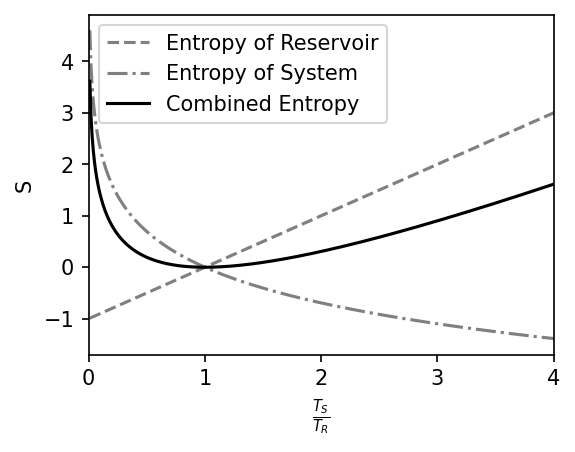

In [10]:
import numpy as np
import matplotlib.pyplot as plt

C = 1 #Just setting the heat capacity to a positive number.
T_S_over_T_R = np.arange(0.01,4.05,0.01)
S_R = C*(T_S_over_T_R-1)
S_S = C*np.log(1/T_S_over_T_R)

plt.figure(figsize=[4,3],dpi=150)
plt.plot(T_S_over_T_R,S_R,'--',color='grey',label='Entropy of Reservoir')
plt.plot(T_S_over_T_R,S_S,'-.',color='grey',label='Entropy of System')
plt.plot(T_S_over_T_R,S_S+S_R,'-',color='k',label='Combined Entropy')
plt.ylabel("S")
plt.xlabel(r"$\frac{T_S}{T_R}$")
plt.legend()
plt.xlim(0,4)
plt.savefig("Figures/Entropy_Universe_plot.png")
plt.show()

## Revisiting the first law

Ok, armed with this definition of entropy, let's consider again the first law of thermodynamics, which states that
$$
    {\rm d} U = {\rm d} Q + {\rm d} W
$$
For a reversible change, we now have that
$$
    {\rm d} Q = T {\rm d} S
$$
by rearranging Clausius' law. We also know that 
$$
    {\rm d} W = -P {\rm d} V
$$
This means that 
$$
    {\rm d} U = T{\rm d} S - P {\rm d} V
$$
We have derived this assuming everything is reversible. However, all of the quantities in the previous equation are functions of state - that is, they are path independant. This means that this equation also holds for irreversible changes. This might not seem immediately obvious. As a quick check, remember that for irreversible changes we have that
$$
    {\rm d} Q \leq T {\rm d} S
$$
while
$$
    {\rm d} W \geq - P {\rm d} V.
$$
So for irreversible changes, ${\rm d} Q $ decreases while ${\rm d} W $ increases, meaning ${\rm d} U$ is balanced. As such 
$$
    {\rm d} U = T{\rm d} S - P {\rm d} V
$$
is true **for any process**!
Now, using one of the tricks we used earlier, given that U is now only a function of S and V, we can write U as
$$
    {\rm d} U = \left( \frac{\partial U}{\partial S}\right)_V {\rm d} S + \left( \frac{\partial U}{\partial V}\right)_S {\rm d} V
$$
let's us identify pressure and temperature as
\begin{align}
    T &= \left( \frac{\partial U}{\partial S}\right)_V\\
    P &= -\left( \frac{\partial U}{\partial V}\right)_S\\
\end{align}

## Summary

Thus, the important equations for us are

1. ${\rm d} U = {\rm d} Q + {\rm d} W$, which is always true.
2. ${\rm d} Q = T{\rm d} S$, which is true for reversible changes.
3. ${\rm d} W = -P{\rm d} V$, which is true for reversible changes.
4. ${\rm d} U = T{\rm d} S-P{\rm d} V$, which is always true.

For irreversible changes,  ${\rm d} Q \leq T{\rm d} S$ and ${\rm d} W \geq -P{\rm d} V$.

# The Joule Expansion

Consider the following isolated system. Imagine we have a 2 containers, each of volume $V_0$, and which are initially isolated from each other by a valve. In the left container, we have an ideal gas with initial pressure $P_i$, and in the right, we have a vacuum. The ideal gas is described by the equation of state $P_i V_0 = N k_{\rm B} T_i$.

![Joule_Expansion](Figures/Joule_Expansion.png)

We then open the valve, and the gas rapidly expands to fill both containers. At this stage, the gas will fill a volume of $2V_0$ and have a temperature and pressure of $T_f$ and $P_f$ respectively. It's equation of state is thus $P_f 2V_0 = N k_{\rm B} T_f$.

Since the entire system is thermally isolated, we have that $\Delta U = 0$. Recalling from earlier that the internal energy, U, of an ideal gas only depends on temperature, this then means that $\Delta T = 0$, and so $T_i=T_f$. As such, we get
\begin{align}
    P_i V_0 &= N k_{\rm B} T_i =  P_f 2 V_0\\
    P_f &= \frac{P_i}{2}
\end{align}

However, calculating the entropy associated with this change is difficult. Immediately after opening the valve, the gas will expand rapidly, meaning it is not in equilibrium and will not be undergoing a reversible process. However, entropy is a function of state. This means that the difference in entropy between the gas prior to the valve opening and after opening the valve and letting the gas reach equilibrium after expanding irreversibly **is the same** as if we had reverisble expanded the gas, as the change in entropy is path independant.

As such, we can pretend that the gas were expanded, say, isothermally, calculate the change in the entropy for this expansion, and it will be the same as for the irreversible process. this gives
\begin{align}
    \Delta S &= \int ^{f}_{i} {\rm d} S \\
             &= \int ^{V_f}_{V_i} \frac{P}{T}{\rm d} V \\
             &= \frac{1}{T}\int ^{2V_0}_{V_0} P{\rm d} V \\
             &= \frac{1}{T}\int ^{2V_0}_{V_0} \frac{Nk_{\rm B}T}{V}{\rm d} V \\
             &= Nk_{\rm B}\int ^{2V_0}_{V_0} \frac{1}{V}{\rm d} V \\
             &= Nk_{\rm B} \ln 2\\
\end{align}

The first law of thermodynamics can be written as
$$
    {\rm d} U = T {\rm d}S - P{\rm d} V
$$
and is always true. From this, in the last lecture we arrived at the following definition for temperature
$$
    T = \left(\frac{\partial S}{\partial U}\right)_V
$$
Several lectures ago, we also definied temperature in terms of the statistical weight of a system in a given macrostate to be
$$
    \frac{1}{k_{\rm B} T} = \frac{{\rm d} \ln \Omega}{{\rm d} E}.
$$
Comparing these, we can then identify another definition of $S$ as
$$
    S = k_{\rm B} \ln \Omega.
$$
At this point, it's important to note that this definition assumes that the system is in a macrostate with a fixed energy (this comes from the section entitled "Temperature" back in Lecture 2). We'll generalise the result later.

## Entropy of mixing

Let us know consider 2 different ideal gases. They are initially in separate vessels with volume $x V$ an $(1-x) V$ respectively, where $0<x<1$. Both gases are at the same pressure, $P$, and temperature, $T$.

![Entropy_of_mixing](Figures/Entropy_of_mixing.png)

We can write the pressure of either gas to be
$$
    P = \frac{N_{1,2}k_{\rm B}T}{V_{1,2}}
$$
Since the pressure in both gases is the same, this gives
$$
    \frac{N_1k_{\rm B}T}{xV} = \frac{N_2k_{\rm B}T}{(1-x)V}
$$
If we then define $N=N_1+N_2$ as the total number of particles, then we get that $N_1 = xN$ and $N_2 = (1-x)N$.

If we now open the tap, then the gases will mix. As we considered for the Joule expansion, we can calculate the entropy by imagining that the mixing occurs reversibly. Let's imagine an isothermal expansion, which means that the internal energies of the gases do not change. This means that
$$
    T {\rm d}S = P{\rm d} V \rightarrow {\rm d}S = \frac{P{\rm d} V}{T} \rightarrow {\rm d}S =  \frac{N k_{\rm B}}{V} {\rm d} V
$$
Now, to find the total change in entropy, we consider the change in entropy due to gas 1 expanding isothermally to fill the full container, and gas 2 expanding isothermally to fill the full container
\begin{align}
    \Delta S &= \int_{xV}^{V} \frac{N_1 k_{\rm B}}{V_1} {\rm d} V_1 + \int_{(1-x)V}^{V} \frac{N_2 k_{\rm B}}{V_2} {\rm d} V_2 \\
             &= \int_{xV}^{V} \frac{xN k_{\rm B}}{V_1} {\rm d} V_1 + \int_{(1-x)V}^{V} \frac{(1-x)N k_{\rm B}}{V_2} {\rm d} V_2 \\
             &= xN k_{\rm B} \int_{xV}^{V} \frac{1}{V_1} {\rm d} V_1 + (1-x)N k_{\rm B}\int_{(1-x)V}^{V} \frac{1}{V_2} {\rm d} V_2 \\
             &= xN k_{\rm B} (\ln (V) - \ln (xV)) + (1-x)N k_{\rm B}(\ln (V) - \ln ((1-x)V)) \\
             &= -N k_{\rm B}[x\ln (x) + (1-x)\ln(1-x)]
\end{align}
So how does this look?

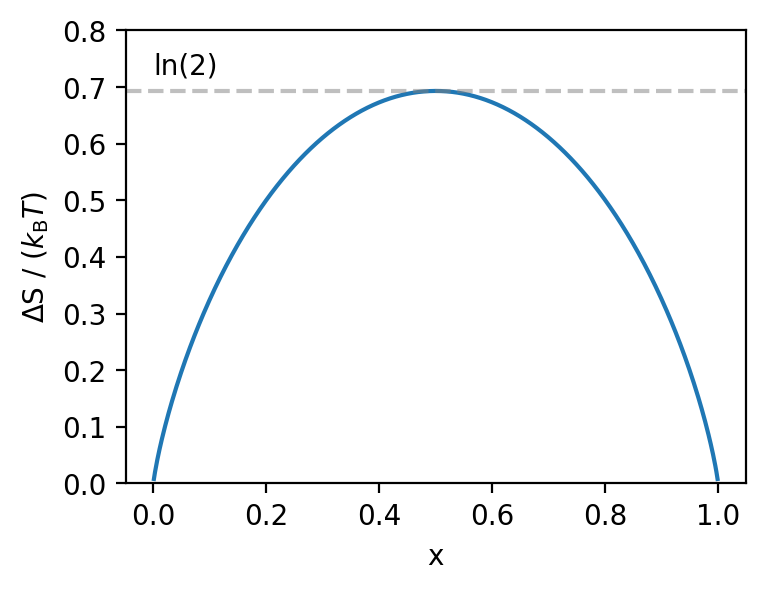

In [18]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.001,1.001,0.002)
S = -(x*np.log(x)+(1-x)*np.log(1-x))

plt.figure(figsize=[4,3],dpi=200)
plt.plot(x,S)
plt.axhline(np.log(2),linestyle='--',color='grey',alpha=0.5)
plt.text(0,np.log(2)+0.03,"ln(2)")
plt.ylim(0.,0.8)
plt.xlabel("x")
plt.ylabel(r"$\Delta$S / ($k_{\rm B} T)$")
plt.show()

From this, it is clear that the maximum change in entropy occurs when $x=0.5$. We can also arrive at this same result by considering the microstates for the gases. Before mixing, we know that gas 1 is only in the first vessel, while gas 2 is only in the second vessel. After mixing, the number of microstates available to each particle increases by 2 - they can either be in the first vessel, or the second vessel. As such, the statistical weight, $\Omega$, must be multipled by $2^N$ to account for these new microstates. This means that 
$$
    \Delta S = k_{\rm B} \ln 2^N = N k_{\rm B} \ln 2
$$


## Combining Entropy & Probability

Consider again $S=k_{\rm B} \ln \Omega$. How does the entropy account for microstates? Let's do an example to check.

Imagine we have a system which has 5 macrostates (that is, these states are easily distinguishable by measuring some macrovariable such as energy), each of which is equally likely to occur. This means that
$$
    S=k_{\rm B} \ln 5
$$
Now assume that each macrostate has 3 microstates (states which we cannot distinguish, so associated perhaps with particle positions or momenta) associated with it, which are also equally likely to occur. This means that there is an additional entropy associated with each of these microstates, $S_{\rm micro} = k_{\rm B} \ln 3$.

There are a total of 15 unique states the system can be in (5 macro, 3 micro for each macro). The total entropy of the system is thus given by 
$$
    S_{\rm total}=k_{\rm B} \ln 15
$$
which can be decomposed into
$$
    S_{\rm total}=k_{\rm B} \ln 5+k_{\rm B} \ln 3
$$
This means that we can write
$$
    S_{\rm total} = S+S_{\rm micro}
$$
The reasons for doing this will become clear in a second.

Now, consider a system which has a total of N equally-likely microstates. These microstates are subdivided into groups corresponding to macrostates, such that a macrostate $i$ has a total of $n_i$ microstates associated with it. We require that
$$
    \sum _i n_i = N
$$
(That is, summing together the number of microstates in each macrostate is the same as the total number of microstates available). The probability that the system is in the $i$th macrostate is then given by
$$
    P_i = \frac{n_i}{N}.
$$
The total entropy of this system is
$$
    S_{\rm total} = k_{\rm B} \ln N
$$
The problem we are faced with is that, quite often, $N$ is difficult to measure. For examples like dipoles oriented in magnetic fields, we have a rough idea (it's of order $2^M$ for M particles), but this is only for a very specific example. In general, we have
$$
    S_{\rm total} = S+S_{\rm micro}
$$
where $S$ is the entropy due to the number of macrostates while $S_{\rm micro}$ is an unknown entropy contribution to the number of available microstates. This is given by
$$
    S_{\rm micro} = <S_i> = \sum_i P_i S_i
$$
Given this, we can do the following
\begin{align}
    S &= S_{\rm total} - S_{\rm micro}\\
      &= k_{\rm B} (\ln N - \sum_i P_i \ln n_i)\\
      &= k_{\rm B} \sum_i P_i( \ln N - \ln n_i)\\
\end{align}
Now, $\ln (N) - \ln (n_i) = \ln(N/n_i) = \ln(1/P_i)= -\ln(P_i)$. This gives us Gibbs' definition of Entropy
$$
    S = - k_{\rm B} \sum_i P_i \ln(P_i)
$$

# Thermodynamic Potentials

Up until this point, we have been working a lot with the internal energy if a system, $U$, which is a function of state. In principle, we can combine $U$ with any other functions of state ($P$, $V$, $S$, $T$) to create new functions of state. This are called **thermodynamic potentiels**. In this next section, we are going to look at some thermodynamic potentials which can be very useful in certain situations.

## Internal energy, $U$

We've spent a lot of time dealing with $U$, so I'm not going to dwell on it too much. Below is simply a summary of where we've encountered $U$ previously.
First,
$$
    {\rm d}U = T{\rm d}S - P{\rm d} V
$$
which is the fundamental thermodynamic potential. From this, we can state that, $U=U(S,V)$. Now we will define an isochoric process as one during which the volume stays constant (${\rm d} V = 0$). In this case, we have
$$
    {\rm d}U = T{\rm d}S
$$
If we have a reversible isochoric process, then we also have that
$$
    {\rm d}U = {\rm d}Q = C_V {\rm d} T
$$
Thus
$$
    \Delta U = \int_{T_1} ^{T_2} C_V {\rm d} T
$$
The fundamental thermodynamic relation also gives us that 
$$
   T = \left(\frac{\partial U}{\partial S}\right)_V ; P = -\left(\frac{\partial U}{\partial V}\right)_S
$$

This is only true at constant volume. To handle a process at constant pressure, we need a different potential.


## Enthalpy, H

Let enthalpy be
$$
    H = U+PV.
$$
Thus, an infinitesimal change in $H$ is given by
\begin{align}
    {\rm d} H &= T{\rm d} S - P {\rm d} V + P {\rm d} V + V {\rm d} P\\
    {\rm d} H &= T{\rm d} S + V {\rm d} P
\end{align}
From this, we can say that $H=H(S,P)$. For an isobaric process (${\rm d}P=0$), we then have
$$
    {\rm d} H = T{\rm d} S
$$
and for a reversible process we have
$$
    {\rm d}H = {\rm d}Q = C_P {\rm d} T
$$
Thus
$$
    \Delta H = \int_{T_1} ^{T_2} C_P {\rm d} T
$$
Thus, for a process performed at contant pressure, then the enthalpy represents the heat transferred to or from the system.
Our definition of the enthalpy also gives us that
$$
   T = \left(\frac{\partial H}{\partial S}\right)_P ; V = \left(\frac{\partial H}{\partial P}\right)_S
$$

## Helmholtz Free Energy (or Helmholtz Function)

The above potentials are both functions of entropy, $S$, which can difficult to vary experimentally. This next thermodynamic potential does not suffer the same drawback. Let's define the Helmholtz Free Energy as
$$
    F = U - TS.
$$
This gives
\begin{align}
    {\rm d} F &= T {\rm d} S - P {\rm d} V - T {\rm d} S - S {\rm d} T\\
              &= - S {\rm d} T - P {\rm d} V
\end{align}
From this, we can say that $F=F(T,V)$. For an isothermal process, we thus have
$$
    {\rm d} F = - P {\rm d} V
$$
giving
$$
    \Delta F = - \int_{V_1}^{V_2} P {\rm d} V
$$
Our definition of the Helmholtz Free Energy also gives us that
$$
   S = -\left(\frac{\partial F}{\partial T}\right)_V ; P = -\left(\frac{\partial F}{\partial V}\right)_T
$$

## Gibbs Free Energy (or Gibbs Function)

Let
$$
    G = H - TS
$$
This gives
\begin{align}
    {\rm d} G &= T {\rm d} S + V {\rm d} P - T {\rm d} S - S {\rm d} T\\
              &= - S {\rm d} T + V {\rm d} P
\end{align}
Thus $G=G(T,P)$, which is particularly useful as both $T$ and $P$ are easy to control and change in experiments. Thus, if you have an isothermal isobaric process, then ${\rm d} G = 0$. This will be useful when we are studying phase transitions later.
Our definition of the Gibbs Free Energy also gives us that
$$
   S = -\left(\frac{\partial G}{\partial T}\right)_P ; V = \left(\frac{\partial G}{\partial P}\right)_T
$$